<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 3: Kugelfunktionen
# Quadratische Gleichungen
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
from ipywidgets import interactive, fixed
import ipywidgets as widgets

Eine **quadratische Gleichung** hat die Form:
$$
a x^2 + b x + c = 0
$$
mit $a$, $b$ und $c$ den Koeffizienten.

In [2]:
def f(x,a,b,c):
    """
    quadratic equation
    """
    f = a*x**2 + b*x +c
    return f

In [3]:
def plot_quadratic(x,a,b,c):
    # plot    
    plt.figure(figsize=(8,4))
    plt.plot(x,f(x,a,b,c),linestyle='solid',color='red',linewidth=4,label='y')
    plt.legend()
    plt.grid()

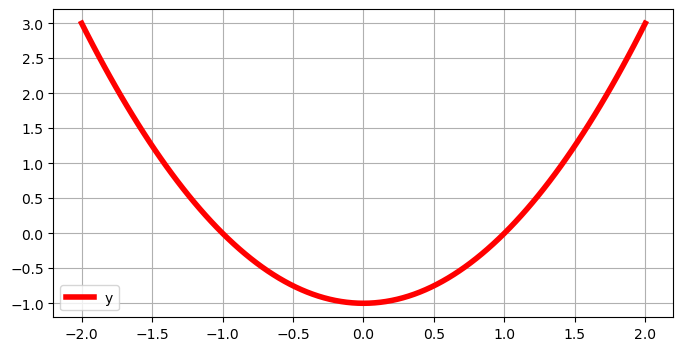

In [4]:
x = np.linspace(-2,2,101)
a,b,c = 1,0,-1

plot_quadratic(x,a,b,c)

----
## Normalenform

Dividieren wir die Gleichung durch $a$, folgt die **Normalenform**:
$$
x^2 + {b \over a} x + {c \over a} = 0
$$

## Zerlegung in Linearfaktoren

Die **quadratische Gleichung** 
$$
ax^2+bx+c=0
$$
kann in **Linearfaktoren** zerlegt werden:
$$
a (x-x_1) (x-x_2) = 0
$$

## Nullstellen

Die Anzahl der Nullstellen kann durch die **Determinante** bestimmt werden.
$$
D=\sqrt{b^2 - 4ac}
$$

Es gilt
- $D>0$: Zwei reelle Nullstellen $x_1$ und $x_2$
- $D=0$: Eine reelle Nullstelle $x_1$
- $D<0$: Keine reelle Nullstelle (aber ...)

Die Lösungen der quadratischen Gleichung lassen sich mit folgender Formel berechnen:
$$
x_{1,2} = {{-b \pm \sqrt{b^2 - 4ac}} \over {2a}}
$$

In [5]:
def determinant(a,b,c):
    # determinant for quadratic equation
    D = np.sqrt(b**2 - 4*a*c)
    return D

In [6]:
D = determinant(a,b,c)
print('determinant: ',D)

determinant:  2.0


In [7]:
if (D >= 0):
    x1 = (-b + np.sqrt(b**2 - 4*a*c)) / (2*a)
    x2 = (-b - np.sqrt(b**2 - 4*a*c)) / (2*a)
    roots = [x1,x2]
    print('coeff: ',a,b,c)
    print('roots: ',roots)
    # use numpy.roots()
    roots1 = np.roots([a,b,c])
    print('roots: ',roots1)

coeff:  1 0 -1
roots:  [1.0, -1.0]
roots:  [-1.  1.]


In [10]:
def plot_quadratic_roots(x,roots,a,b,c):
    # plot
    function='f(x)='+str(a)+'x$^2$+'+str(b)+'x+'+str(c)
    plt.figure(figsize=(8,4))
    plt.plot(x,f(x,a,b,c),linestyle='solid',color='red',linewidth=4,label=function)
    plt.plot(roots,np.zeros(len(roots)),lw=0,marker='o',markersize=10)
    plt.plot(np.roots([a,b,c]),np.zeros(len(np.roots([a,b,c]))),lw=0,marker='x',markersize=10)
    plt.legend()
    plt.grid()

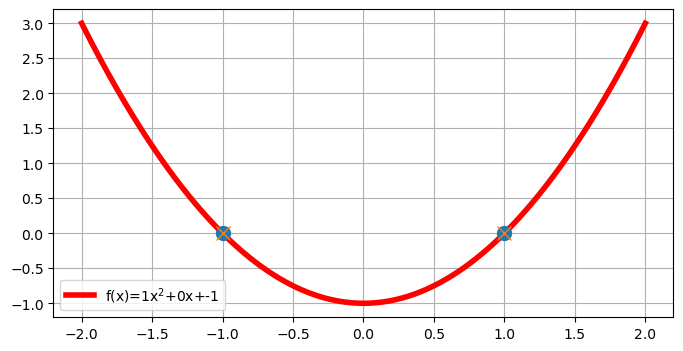

In [11]:
plot_quadratic_roots(x,roots,a,b,c)

----
## Interaktive Darstellung

In [15]:
def plot_quadratic_interact(minmax,a,b,c):
    xmin=minmax[0];xmax=minmax[1]
    x = np.linspace(xmin,xmax,51)
    y = f(x,a,b,c)
    # calculate determinant
    det=cmath.sqrt(b**2-4*a*c)
    # get roots
    x0 = np.roots([a,b,c])
    #print('roots: ',x0)
    xs,ys = 0,0
    if (a != 0):
        xs = -b/(2*a)
        ys = c - b**2/(4*a)
    function='f(x)='+str(round(a,2))+'x$^2$+'+str(round(b,2))+'x+'+str(round(c,2))
    plt.figure(figsize=(8,6))
    plt.xlim([xmin,xmax])
    plt.ylim([-4,14])
    plt.plot([xmin,xmax],[0,0],color='grey')
    plt.plot(x,y,label=function)
    plt.plot(x0,f(x0,a,b,c),linewidth='0',marker='.',markersize=40,label='Nullstellen')
    plt.plot(xs,ys,linewidth='0',marker='.',markersize=40,label='Scheitelpunkt')
    function='f(x)='+str(a)+'x$^2$+'+str(b)+'x+'+str(c)
    plt.title('quadratic function')
    plt.legend()

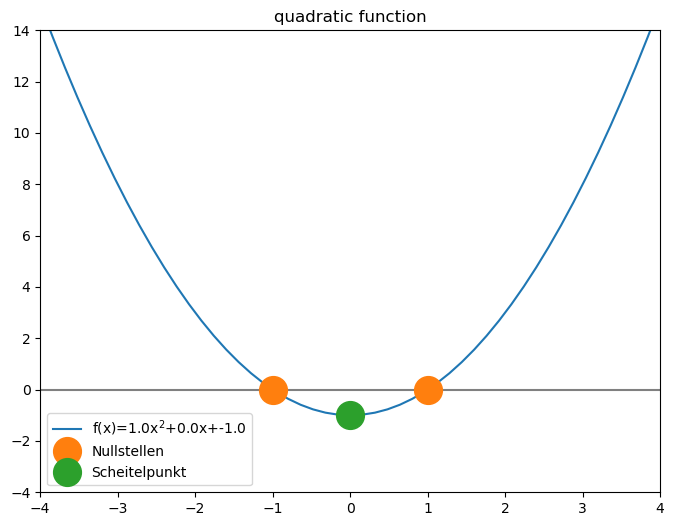

In [16]:
plot_quadratic_interact([-4,4],a=1.,b=0.,c=-1.)

Und das ganze interaktiv:

In [17]:
w = dict(
minmax=widgets.FloatRangeSlider(min=-10,max=10,step=1,value=[-4,4],continuous_update=False,description='xmin'),
a=widgets.FloatSlider(min=-2,max=2,step=0.1,value=1.0,description='a'),
b=widgets.FloatSlider(min=-2,max=2,step=0.1,value=0.0,description='b'),
c=widgets.FloatSlider(min=-2,max=2,step=0.1,value=-1.0,description='c')
)

output = widgets.interactive_output(plot_quadratic_interact, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

Wie kommen wir auf die Lösungsformel?

Starte mit der quadratischen Gleichung und ergänze, um eine binomische Formel zu bekommen:
$$
\begin{array}{rcll}
ax^2+bx+c    &=& 0      & | -c\\
ax^2+bx      &=& -c     & |\times 4a\\
4a^2x^2+4abx &=& -4ac   & | +b^2 \\
(2ax)^2 + 2 \times 2abx + b^2 &=& b^2-4ac & | \mbox{umformen auf bin. Formel}\\
(2ax+b)^2    &=& b^2-4ac & | \sqrt{}\\
2ax+b        &=& \pm \sqrt{b^2-4ac} & | -b\\
2ax          &=& -b \pm \sqrt{b^2-4ac} & |/(2a) \\
x            &=& {{-b \pm \sqrt{b^2-4ac}} \over {2a}}
\end{array}
$$

## Beispiele

In [ ]:
import numpy as np
import cmath
import matplotlib.pyplot as plt
# define functions
x = np.linspace(-10,10,41)
y1 = x**2 + 2*x - 35
y2 = x**2 -4*x + 4
y3 = x**2+12*x+37
# plot functions
plt.figure(figsize=(12.0, 6.0))
plt.plot([-10,10],[0,0],linestyle='dashed',color='grey',linewidth=1)
plt.plot(x,y1,linestyle='solid',color='red',linewidth=3,label='x$^2$+2x-35')
plt.plot(x,y2,linestyle='solid',color='green',linewidth=3,label='x$^2$-4x+4')
plt.plot(x,y3,linestyle='solid',color='blue',linewidth=3,label='x$^2$+12x+37')
plt.legend()
plt.show()

... done

In [ ]:
import math
x=0.
print(np.sqrt(x))
print(math.sqrt(x))
print(cmath.sqrt(x))
print(cmath.sqrt(x).real,cmath.sqrt(x).imag)
a=1j
print(a)
a=1j*-1
print(a)
-0==+0